In [3]:
#### Notebook 2019-07-30 23:37CT by Joshua Yao-Yu Lin

import torch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from  torch.autograd import Variable
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision.models as models
import lenstronomy.Util.image_util as image_util
import os, sys
import pandas as pd
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc
import datetime
from tensorboardX import SummaryWriter

In [4]:
root_folder = "/media/joshua/HDD_fun2/time_delay_challenge/Third_sims/"
train_folder = "train/"
test_folder = "test/"
train_data = pd.read_csv(root_folder + train_folder + "lens_info.csv")
test_data = pd.read_csv(root_folder + test_folder + "lens_info.csv")

EHT_test_path = root_folder + test_folder
files = os.listdir(EHT_test_path)
loaded_model_path = './saved_model/2019-08-09power_law_pred_resnet18.mdl'


if os.path.exists(loaded_model_path):
    net = torch.load(loaded_model_path)
    print('loaded mdl！')
else:
    print('No model to load. Should stop!')
    
print(os.getcwd()) 


normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
data_transform = transforms.Compose([
            transforms.ToTensor(), # scale to [0,1] and convert to tensor
            normalize,
            ])
target_transform = torch.Tensor

loaded mdl！
/home/joshua/Documents/git_work_zone/time_delay_challenge


In [5]:
glo_batch_size = 1
test_num_batch = 1



class DeepLenstronomyDataset(Dataset): # torch.utils.data.Dataset
    def __init__(self, root_dir, train=True, transform=None, target_transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.target_transform = target_transform
        self.train = train  # training set or test set
        self.train_folder = 'train'#'data_train'
        self.test_folder = 'test'#'data_test'
        #self.df = pd.read_csv('../input/clean-full-train/clean_full_data.csv') #+ '/clean_full_data.csv')


        if self.train:
            self.path = os.path.join(self.root_dir, self.train_folder)
            self.df = pd.read_csv(self.path + '/lens_info.csv')


            #self.length = TRAINING_SAMPLES
        else:
            self.path = os.path.join(self.root_dir, self.test_folder)
            self.df = pd.read_csv(self.path + '/lens_info.csv')
            #self.length = TESTING_SAMPLES

    def __getitem__(self, index):
        #   gamma  center_x  center_y        e1        e2  source_x  source_y  gamma_ext  psi_ext
        #print(self.df['name'].iloc[[index]])
        name = self.df['name'].iloc[[index]]
        theta_E = self.df['theta_E'].iloc[[index]]
        gamma = self.df['gamma'].iloc[[index]]
        center_x = self.df['center_x'].iloc[[index]]
        center_y = self.df['center_y'].iloc[[index]]
        e1 = self.df['e1'].iloc[[index]]
        e2 = self.df['e2'].iloc[[index]]
        source_x = self.df['source_x'].iloc[[index]]
        source_y = self.df['source_y'].iloc[[index]]
        gamma_ext = self.df['gamma_ext'].iloc[[index]]
        psi_ext = self.df['psi_ext'].iloc[[index]]
        img_path = self.path + "/" + str(name.values[0]) + ".npy"
        img = np.load(img_path)
        img = scipy.ndimage.zoom(img, 224/100, order=1)
        image = np.zeros((3, 224, 224))
        for i in range(3):
            image[i, :, :] += img
        return image, theta_E.values, gamma.values, center_x.values, center_y.values, e1.values, e2.values, source_x.values, source_y.values, gamma_ext.values, psi_ext.values


    def __len__(self):
        return self.df.shape[0]
    
train_loader = torch.utils.data.DataLoader(DeepLenstronomyDataset(root_folder, train=True, transform=data_transform, target_transform=target_transform),
                    batch_size = glo_batch_size, shuffle = True
                    )

test_loader = torch.utils.data.DataLoader(DeepLenstronomyDataset(root_folder, train=False, transform=data_transform, target_transform=target_transform),
            batch_size = glo_batch_size, shuffle = True
            )

lens parameters: theta_E, e1, e2(ground trouth) 1.7371715743042022 -0.1462361762571602 0.14702076103232414
lens parameters: theta_E, e1, e2(prediction): 1.8201654 -0.15642124 0.22009692
source positions(ground trouth) -0.053694879838687606 0.016549721617493768
source positions(prediction): 0.040894277 -0.02949058
lens parameters: gamma, center_x, center_y(ground trouth) 2.021129653781926 -0.07103796710371943 0.02361131356720079
parameters: gamma, center_x, center_y(prediction): 2.0450592 -0.038955025 0.015170332


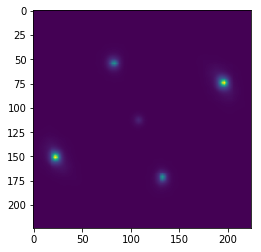

lens parameters: theta_E, e1, e2(ground trouth) 1.0083605062253709 -0.034483932586098665 -0.14252506269337478
lens parameters: theta_E, e1, e2(prediction): 1.1254468 -0.038880467 -0.09451299
source positions(ground trouth) -0.013241344187073805 -0.07500593135309197
source positions(prediction): 0.01906813 6.2400475e-05
lens parameters: gamma, center_x, center_y(ground trouth) 1.9675039284104696 0.32834201510045097 0.2178968203392884
parameters: gamma, center_x, center_y(prediction): 2.0044696 0.22983718 0.20891054


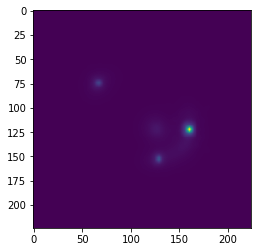

lens parameters: theta_E, e1, e2(ground trouth) 1.3578772186104289 -0.08717888948489116 0.000721943931655763
lens parameters: theta_E, e1, e2(prediction): 1.3789377 -0.07929468 0.064509936
source positions(ground trouth) 0.03743854722079378 0.06703510565322011
source positions(prediction): 0.067714654 0.0587636
lens parameters: gamma, center_x, center_y(ground trouth) 2.01113567498335 0.08231818327464932 0.02646879411992334
parameters: gamma, center_x, center_y(prediction): 2.0027425 0.10509854 0.0043753055


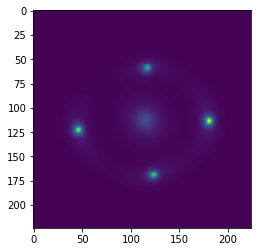

lens parameters: theta_E, e1, e2(ground trouth) 1.0962350847784144 0.02599672657127195 -0.13455266966121454
lens parameters: theta_E, e1, e2(prediction): 1.1452304 0.0758279 -0.11646732
source positions(ground trouth) 0.04344193196206512 0.07483150677986898
source positions(prediction): -0.014050305 0.08622152
lens parameters: gamma, center_x, center_y(ground trouth) 1.9064362575477116 0.3454528781821188 -0.03171125260527451
parameters: gamma, center_x, center_y(prediction): 2.000524 0.35586518 -0.03737695


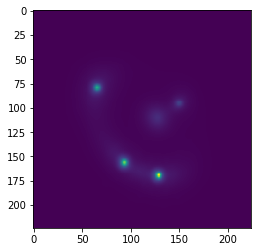

lens parameters: theta_E, e1, e2(ground trouth) 0.7710705695823421 -0.22717358508596136 -0.4387449872556196
lens parameters: theta_E, e1, e2(prediction): 1.1829252 -0.2801718 -0.12171408
source positions(ground trouth) 0.12288058488348502 -0.005952373443650044
source positions(prediction): 0.10364132 0.08620461
lens parameters: gamma, center_x, center_y(ground trouth) 1.970247135369449 -0.2398306157279012 0.08068885837882629
parameters: gamma, center_x, center_y(prediction): 1.9908582 -0.16656472 0.048830763


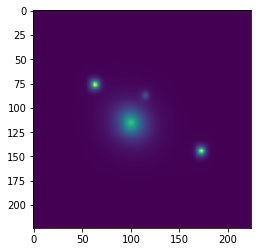

lens parameters: theta_E, e1, e2(ground trouth) 1.1688011765295043 0.3315051990657433 0.1337200302271385
lens parameters: theta_E, e1, e2(prediction): 1.3980433 0.35493106 0.13307324
source positions(ground trouth) 0.040215144270542034 -0.05576347426014297
source positions(prediction): 0.016403027 -0.054247342
lens parameters: gamma, center_x, center_y(ground trouth) 2.079114809057579 -0.20704585677197468 0.24193608193268615
parameters: gamma, center_x, center_y(prediction): 2.0484324 -0.07916462 0.2815033


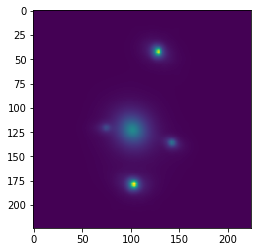

lens parameters: theta_E, e1, e2(ground trouth) 1.7149848262384977 -0.038615445127595384 -0.22125941477672476
lens parameters: theta_E, e1, e2(prediction): 2.0176983 -0.0342244 -0.2404361
source positions(ground trouth) 0.022142501812407237 -0.087532917957452
source positions(prediction): 0.09764106 -0.022597438
lens parameters: gamma, center_x, center_y(ground trouth) 1.99472402518538 -0.1163558441203426 -0.025124751255128586
parameters: gamma, center_x, center_y(prediction): 2.0498047 -0.061691336 -0.027301092


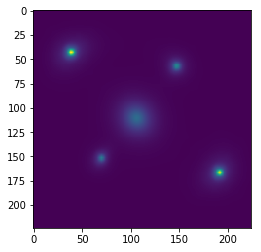

lens parameters: theta_E, e1, e2(ground trouth) 1.1723278299239694 0.14285150349760908 0.6022572213806354
lens parameters: theta_E, e1, e2(prediction): 1.8424162 0.12186284 0.36648443
source positions(ground trouth) -0.041507823202109384 -0.09793046957760497
source positions(prediction): 0.030597076 -0.07766662
lens parameters: gamma, center_x, center_y(ground trouth) 2.0367549923809585 0.0018232297941447762 0.3305605739082149
parameters: gamma, center_x, center_y(prediction): 2.0053172 -0.079068504 0.31961092


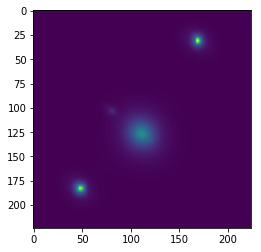

lens parameters: theta_E, e1, e2(ground trouth) 1.3148285532572401 0.07061933730243862 -0.4303682046171344
lens parameters: theta_E, e1, e2(prediction): 1.6374353 0.06388205 -0.58038133
source positions(ground trouth) 0.09938187484657436 -0.05850436597629774
source positions(prediction): 0.09990528 -0.055530332
lens parameters: gamma, center_x, center_y(ground trouth) 1.901411207469931 -0.00954992033993542 0.011049724835182977
parameters: gamma, center_x, center_y(prediction): 2.024404 -0.025222816 0.058607813


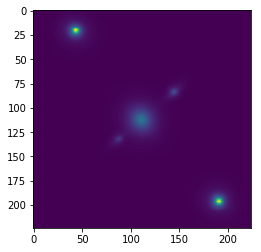

lens parameters: theta_E, e1, e2(ground trouth) 0.7872555630652961 0.060680797682923615 -0.2163347399212059
lens parameters: theta_E, e1, e2(prediction): 0.8250939 0.06256163 -0.2218467
source positions(ground trouth) 0.03963144623269746 -0.030991189435746882
source positions(prediction): 0.11378861 0.012703294
lens parameters: gamma, center_x, center_y(ground trouth) 2.009256101451008 0.05771590450695128 -0.10392323588744634
parameters: gamma, center_x, center_y(prediction): 2.0129027 0.03634896 -0.023578208


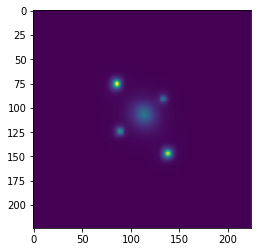

lens parameters: theta_E, e1, e2(ground trouth) 1.0541241411941975 0.06004839325639926 -0.2520492302944468
lens parameters: theta_E, e1, e2(prediction): 1.1946949 0.09991798 -0.3075172
source positions(ground trouth) 0.13534778470061942 -0.10682666930843937
source positions(prediction): 0.18195379 -0.053477086
lens parameters: gamma, center_x, center_y(ground trouth) 1.9059327043230885 0.04486422386194263 -0.0568980044316301
parameters: gamma, center_x, center_y(prediction): 2.050753 0.034017332 0.0039227423


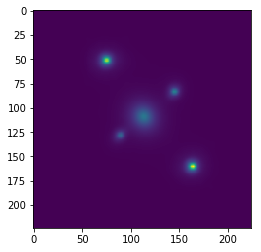

lens parameters: theta_E, e1, e2(ground trouth) 1.0999738568784831 0.3531269209999409 -0.4685701709115838
lens parameters: theta_E, e1, e2(prediction): 1.4047409 0.2798747 -0.38080338
source positions(ground trouth) -0.2455045528272355 -0.12992504718509199
source positions(prediction): 0.04714179 0.13928835
lens parameters: gamma, center_x, center_y(ground trouth) 1.9346766350279219 0.1744442667494416 -0.1990432999749128
parameters: gamma, center_x, center_y(prediction): 1.9593574 0.0023259143 0.020809103


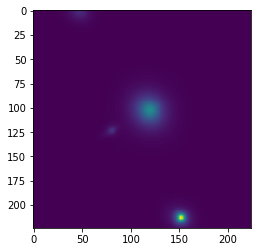

lens parameters: theta_E, e1, e2(ground trouth) 1.4823611484580377 -0.25164670701636344 0.3320164193420368
lens parameters: theta_E, e1, e2(prediction): 1.8064545 -0.3662169 0.42302158
source positions(ground trouth) -0.07274031863492267 0.0498343206445073
source positions(prediction): 0.12299134 0.0597663
lens parameters: gamma, center_x, center_y(ground trouth) 1.94922523325048 -0.3833737875122281 0.09129514387165216
parameters: gamma, center_x, center_y(prediction): 2.0321014 -0.21770956 0.15546347


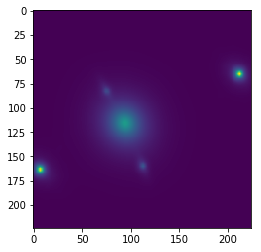

lens parameters: theta_E, e1, e2(ground trouth) 1.245195334975676 0.14381177962247935 -0.02637534142570715
lens parameters: theta_E, e1, e2(prediction): 1.4266261 0.047904447 0.12150479
source positions(ground trouth) 0.05907000305422162 0.16470837277777586
source positions(prediction): 0.032746583 0.2449646
lens parameters: gamma, center_x, center_y(ground trouth) 1.9680976427937 -0.2762012731320162 -0.2484495892351609
parameters: gamma, center_x, center_y(prediction): 2.0141845 -0.31248823 -0.15802048


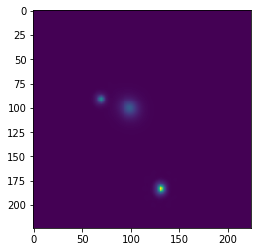

lens parameters: theta_E, e1, e2(ground trouth) 1.2697431742956398 -0.2279546140680857 0.2485106933398085
lens parameters: theta_E, e1, e2(prediction): 1.6023616 -0.37351227 0.3925005
source positions(ground trouth) 0.06368213051274177 0.05942901976516132
source positions(prediction): 0.12502155 0.0010827873
lens parameters: gamma, center_x, center_y(ground trouth) 1.9655926088964584 -0.06428368564037316 0.12357975084238318
parameters: gamma, center_x, center_y(prediction): 2.0220742 -0.010896631 0.10246838


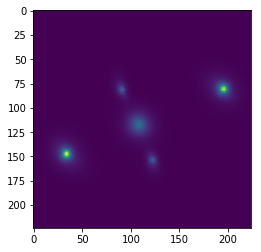

lens parameters: theta_E, e1, e2(ground trouth) 1.5690868759421095 0.4032108081445212 -0.18533482278339092
lens parameters: theta_E, e1, e2(prediction): 1.7073556 0.4501797 -0.17118791
source positions(ground trouth) -0.06720235534561735 0.14051173171659526
source positions(prediction): -0.028998062 0.016608933
lens parameters: gamma, center_x, center_y(ground trouth) 2.0305092404330582 0.03248996348961803 0.041137107331819266
parameters: gamma, center_x, center_y(prediction): 2.0355806 -0.036408193 0.08902241


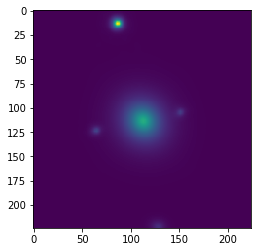

lens parameters: theta_E, e1, e2(ground trouth) 1.468987267697709 0.2754782575993712 -0.15090333509676776
lens parameters: theta_E, e1, e2(prediction): 1.6560354 0.31191367 -0.09341448
source positions(ground trouth) -0.026891843765125368 0.09016877948165747
source positions(prediction): 0.09644251 -0.0044388827
lens parameters: gamma, center_x, center_y(ground trouth) 1.9489110217167809 -0.5375153773310986 -0.07225372453007238
parameters: gamma, center_x, center_y(prediction): 2.0294406 -0.4014112 -0.019118074


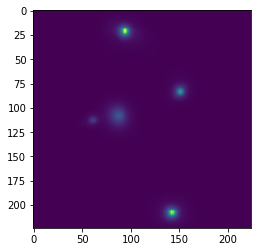

lens parameters: theta_E, e1, e2(ground trouth) 1.5444144956828665 0.09608548047850696 0.22477908313198647
lens parameters: theta_E, e1, e2(prediction): 1.7197666 0.09415358 0.3315294
source positions(ground trouth) -0.007938495231119816 0.01692053542878294
source positions(prediction): 0.0128374025 0.010000655
lens parameters: gamma, center_x, center_y(ground trouth) 2.006227183249756 0.18297468486232507 -0.12060260616120805
parameters: gamma, center_x, center_y(prediction): 2.0344071 0.14896466 -0.14709792


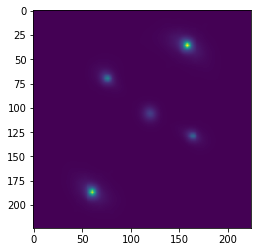

lens parameters: theta_E, e1, e2(ground trouth) 1.3769477285118863 0.1051975553665382 -0.2583729067704162
lens parameters: theta_E, e1, e2(prediction): 1.7013309 0.049015418 -0.30450678
source positions(ground trouth) -0.16107022570569035 -0.0646214414203389
source positions(prediction): -0.13970909 -0.0070695933
lens parameters: gamma, center_x, center_y(ground trouth) 1.95978850625362 0.25348486227269845 0.028104397980815703
parameters: gamma, center_x, center_y(prediction): 2.0355387 0.18341224 0.04168471


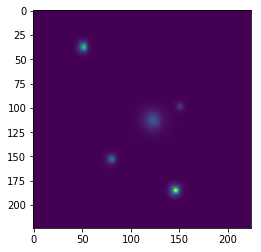

lens parameters: theta_E, e1, e2(ground trouth) 0.8171472189947964 -0.1890225203813194 -0.1232939109164412
lens parameters: theta_E, e1, e2(prediction): 0.901321 -0.2506063 -0.044656463
source positions(ground trouth) 0.1256871787116715 -0.06713420029186498
source positions(prediction): 0.18626082 -0.003880268
lens parameters: gamma, center_x, center_y(ground trouth) 1.951635783947021 -0.008754782567656449 -0.31429708159833725
parameters: gamma, center_x, center_y(prediction): 2.0218027 0.049782492 -0.21986093


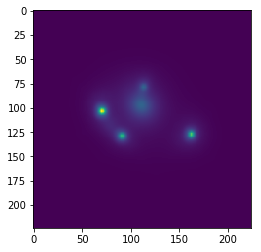

lens parameters: theta_E, e1, e2(ground trouth) 1.0526852338800796 -0.11653161056396133 0.10379845322683212
lens parameters: theta_E, e1, e2(prediction): 1.2162496 -0.116292626 0.16598108
source positions(ground trouth) 0.017929891732797784 -0.018829040630967558
source positions(prediction): 0.050643288 -0.02941232
lens parameters: gamma, center_x, center_y(ground trouth) 1.9581296177786924 0.16944623517977364 -0.1887439156999493
parameters: gamma, center_x, center_y(prediction): 2.0064974 0.19309877 -0.16935799


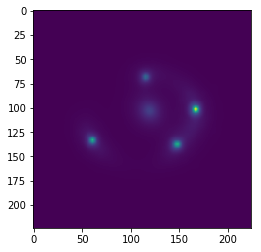

lens parameters: theta_E, e1, e2(ground trouth) 0.8483518758221079 0.3069801425481203 0.009937965436759457
lens parameters: theta_E, e1, e2(prediction): 0.98897946 0.2800653 0.051375292
source positions(ground trouth) 0.08089394623152706 -0.0582592974696968
source positions(prediction): 0.14201415 0.035073854
lens parameters: gamma, center_x, center_y(ground trouth) 2.044691119214604 0.1818075915370929 0.23324274745837734
parameters: gamma, center_x, center_y(prediction): 2.0023618 0.16993031 0.20291352


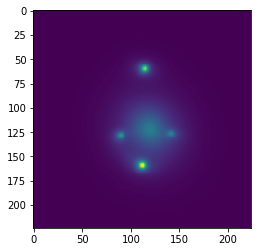

In [19]:
net.cuda()
net.eval()

for batch_idx, (data, theta_E, gamma, center_x, center_y, e1, e2, source_x, source_y, gamma_ext, psi_ext) in enumerate(test_loader):
    img = data
    data = data.float()# theta_E.float(), gamma.float(), center_x.float(), center_y.float(), e1.float(), e2.float(), source_x.float(), source_y.float(), gamma_ext.float(), psi_ext.float()
    data= Variable(data).cuda()# Variable(theta_E).cuda(), Variable(gamma).cuda(), Variable(center_x).cuda(), Variable(center_y).cuda(), Variable(e1).cuda(), Variable(e2).cuda(), Variable(source_x).cuda(), Variable(source_y).cuda(), Variable(gamma_ext).cuda(), Variable(psi_ext).cuda()


    print("lens parameters: theta_E, e1, e2(ground trouth)", theta_E.cpu().numpy()[0][0], e1.cpu().numpy()[0][0], e2.cpu().numpy()[0][0])
    output = net(data)
    print("lens parameters: theta_E, e1, e2(prediction):", output[0][0].detach().cpu().numpy(), output[0][4].detach().cpu().numpy(), output[0][5].detach().cpu().numpy())
    print("source positions(ground trouth)", source_x.cpu().numpy()[0][0], source_y.cpu().numpy()[0][0])
    print("source positions(prediction):", output[0][6].detach().cpu().numpy(), output[0][7].detach().cpu().numpy())
    print("lens parameters: gamma, center_x, center_y(ground trouth)", gamma.cpu().numpy()[0][0], center_x.cpu().numpy()[0][0], center_y.cpu().numpy()[0][0])
    print("parameters: gamma, center_x, center_y(prediction):", output[0][1].detach().cpu().numpy(), output[0][2].detach().cpu().numpy(), output[0][3].detach().cpu().numpy())
    
    plt.imshow(data.cpu().numpy()[0,0,:,:])
    plt.show()

    if batch_idx > 20:
        break

    
    
    
    

In [7]:
net.cuda()
net.eval()

theta_E_target_list = []
theta_E_output_list = []
gamma_target_list = []
gamma_output_list = []
center_x_target_list = []
center_x_output_list = []
center_y_target_list = []
center_y_output_list = []

e1_target_list = []
e1_output_list = []
e2_target_list = []
e2_output_list = []




source_x_target_list = []
source_x_output_list = []
source_y_target_list = []
source_y_output_list = []

for batch_idx, (data, theta_E, gamma, center_x, center_y, e1, e2, source_x, source_y, gamma_ext, psi_ext) in enumerate(test_loader):
    img = data
    data = data.float()#, theta_E.float(), gamma.float(), center_x.float(), center_y.float(), e1.float(), e2.float(), source_x.float(), source_y.float(), gamma_ext.float(), psi_ext.float()
    data= Variable(data).cuda()#Variable(theta_E).cuda(), Variable(gamma).cuda(), Variable(center_x).cuda(), Variable(center_y).cuda(), Variable(e1).cuda(), Variable(e2).cuda(), Variable(source_x).cuda(), Variable(source_y).cuda(), Variable(gamma_ext).cuda(), Variable(psi_ext).cuda()
    
    output = net(data)
    theta_E_target_list.append(theta_E.cpu().numpy()[0][0])
    gamma_target_list.append(gamma.cpu().numpy()[0][0])
    center_x_target_list.append(center_x.cpu().numpy()[0][0])
    center_y_target_list.append(center_y.cpu().numpy()[0][0])
    e1_target_list.append(e1.cpu().numpy()[0][0])
    e2_target_list.append(e2.cpu().numpy()[0][0])
    source_x_target_list.append(source_x.cpu().numpy()[0][0])
    source_y_target_list.append(source_y.cpu().numpy()[0][0])
    
    
    theta_E_output_list.append(output[0][0].detach().cpu().numpy())
    gamma_output_list.append(output[0][1].detach().cpu().numpy())
    center_x_output_list.append(output[0][2].detach().cpu().numpy())
    center_y_output_list.append(output[0][3].detach().cpu().numpy())
    e1_output_list.append(output[0][4].detach().cpu().numpy())
    e2_output_list.append(output[0][5].detach().cpu().numpy())
    source_x_output_list.append(output[0][6].detach().cpu().numpy())
    source_y_output_list.append(output[0][7].detach().cpu().numpy())
    
    
    if batch_idx > 1000:
        break
#     print("lens parameters: theta_E, e1, e2(ground trouth)", theta_E.cpu().numpy()[0][0], e1.cpu().numpy()[0][0], e2.cpu().numpy()[0][0])
#     output = net(data)
#     print("parameters: theta_E, e1, e2(prediction):", output[0][0].detach().cpu().numpy(), output[0][4].detach().cpu().numpy(), output[0][5].detach().cpu().numpy())
#     print("source positions(ground trouth)", source_x.cpu().numpy()[0][0], source_y.cpu().numpy()[0][0])
#     print("source positions(prediction):", output[0][6].detach().cpu().numpy(), output[0][7].detach().cpu().numpy())
#     plt.imshow(data.cpu().numpy()[0,0,:,:])
#     plt.show()

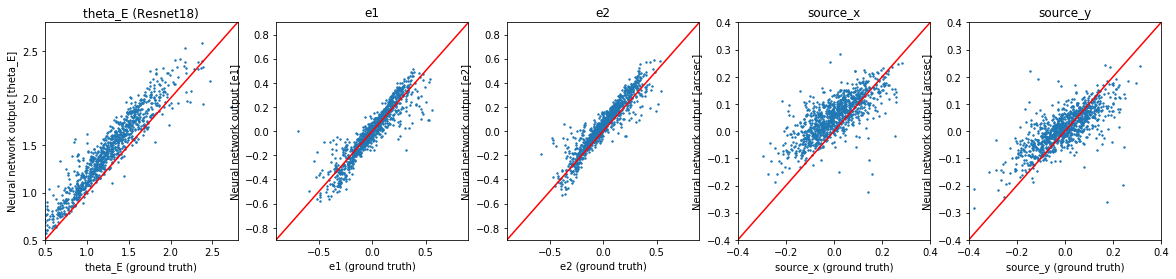

In [15]:
scale= np.linspace(0.5, 2.8 ,100)
plt.figure(figsize=(20, 4))
plt.subplot(1, 5, 1)
plt.scatter(theta_E_target_list, theta_E_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("theta_E (Resnet18)")
plt.xlim(0.5, 2.8)
plt.ylim(0.5, 2.8)
plt.xlabel("theta_E (ground truth)")
plt.ylabel("Neural network output [theta_E]")
#plt.savefig("./" + "scatter_plot.png")

scale= np.linspace(-0.9, 0.9 ,100)
#plt.figure(figsize=(4, 4))
plt.subplot(1, 5, 2)
plt.scatter(e1_target_list, e1_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("e1")
plt.xlim(-0.9, 0.9)
plt.ylim(-0.9, 0.9)
plt.xlabel("e1 (ground truth)")
plt.ylabel("Neural network output [e1]")


scale= np.linspace(-0.9, 0.9 ,100)
plt.subplot(1, 5, 3)
plt.scatter(e2_target_list, e2_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("e2")
plt.xlim(-0.9, 0.9)
plt.ylim(-0.9, 0.9)
plt.xlabel("e2 (ground truth)")
plt.ylabel("Neural network output [e2]")


scale= np.linspace(-0.4, 0.4 ,100)
plt.subplot(1, 5, 4)
plt.scatter(source_x_target_list, source_x_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("source_x")
plt.xlim(-0.4, 0.4)
plt.ylim(-0.4, 0.4)
plt.xlabel("source_x (ground truth)")
plt.ylabel("Neural network output [arcsec]")


scale= np.linspace(-0.4, 0.4 ,100)
plt.subplot(1, 5, 5)
plt.scatter(source_y_target_list, source_y_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("source_y")
plt.xlim(-0.4, 0.4)
plt.ylim(-0.4, 0.4)
plt.xlabel("source_y (ground truth)")
plt.ylabel("Neural network output [arcsec]")

plt.savefig("./" + loaded_model_path + "scatter_plot.png")

plt.show()

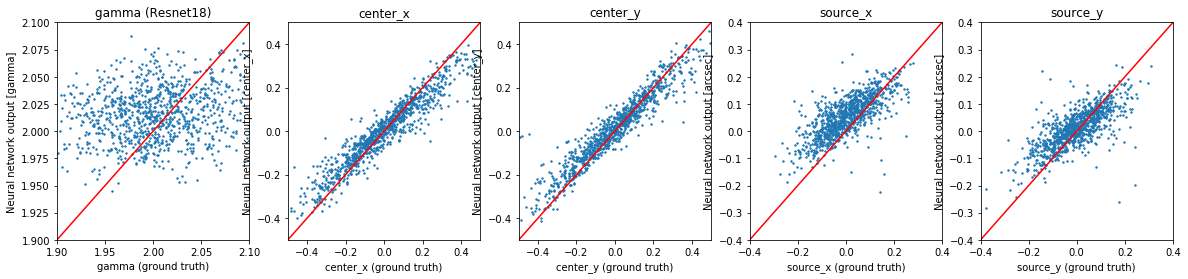

In [18]:
scale= np.linspace(1.9, 2.1 ,100)
plt.figure(figsize=(20, 4))
plt.subplot(1, 5, 1)
plt.scatter(gamma_target_list, gamma_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("gamma (Resnet18)")
plt.xlim(1.9, 2.1)
plt.ylim(1.9, 2.1)
plt.xlabel("gamma (ground truth)")
plt.ylabel("Neural network output [gamma]")
#plt.savefig("./" + "scatter_plot.png")

scale= np.linspace(-0.5, 0.5 ,100)
#plt.figure(figsize=(4, 4))
plt.subplot(1, 5, 2)
plt.scatter(center_x_target_list, center_x_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("center_x")
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.xlabel("center_x (ground truth)")
plt.ylabel("Neural network output [center_x]")


scale= np.linspace(-0.5, 0.5 ,100)
plt.subplot(1, 5, 3)
plt.scatter(center_y_target_list, center_y_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("center_y")
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.xlabel("center_y (ground truth)")
plt.ylabel("Neural network output [center_y]")


scale= np.linspace(-0.4, 0.4 ,100)
plt.subplot(1, 5, 4)
plt.scatter(source_x_target_list, source_x_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("source_x")
plt.xlim(-0.4, 0.4)
plt.ylim(-0.4, 0.4)
plt.xlabel("source_x (ground truth)")
plt.ylabel("Neural network output [arcsec]")


scale= np.linspace(-0.4, 0.4 ,100)
plt.subplot(1, 5, 5)
plt.scatter(source_y_target_list, source_y_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("source_y")
plt.xlim(-0.4, 0.4)
plt.ylim(-0.4, 0.4)
plt.xlabel("source_y (ground truth)")
plt.ylabel("Neural network output [arcsec]")

plt.savefig("./" + loaded_model_path + "gamma_scatter_plot.png")

plt.show()